In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Line Graphs

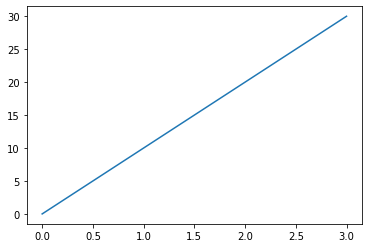

In [2]:
plt.plot([0, 10, 20, 30])
plt.show()

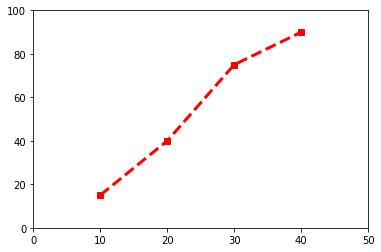

In [3]:
plt.plot([10, 20, 30, 40], [15, 40, 75, 90], linestyle='--', color='r', marker='s', linewidth=3.0)
plt.axis([0, 50, 0, 100])
plt.show()

### Bar Graphs

In [4]:
y_axis = [20, 50, 30]
x_axis = range(len(y_axis))
width_n = 0.4
bar_color = 'yellow'

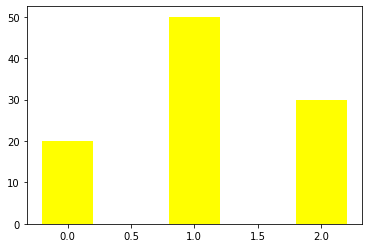

In [5]:
plt.bar(x_axis, y_axis, width=width_n, color=bar_color)
plt.show()

#### Examples Using the Titanic Dataset

In [6]:
train_df = pd.read_csv('./titanic_data/train.csv', sep=',')

In [7]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
p_table = pd.pivot_table(data=train_df, values='PassengerId', index='Sex', columns='Survived', aggfunc='count')
p_table

Survived,0,1
Sex,,
female,81,233
male,468,109


In [15]:
p_table.columns

Int64Index([0, 1], dtype='int64', name='Survived')

In [22]:
bar_1 = p_table[0] # non survivors - male and female

Sex
female     81
male      468
Name: 0, dtype: int64

In [20]:
bar_2 = p_table[1] # survivors - male and female

In [24]:
x_pos = np.arange(len(bar_1)) # range representing the qty of items in the bars (survived/not survived)

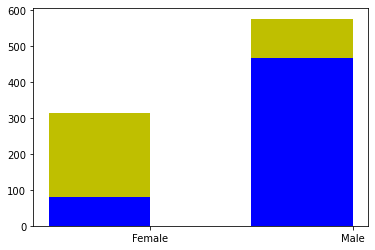

In [27]:
first_bar = plt.bar(x_pos, bar_1, 0.5, color='b')
second_bar = plt.bar(x_pos, bar_2, 0.5, color='y', bottom=bar_1)
# position and labels on the x axis
plt.xticks(x_pos+0.25, ('Female', 'Male'))

plt.show()

#### Pie Chart

In [30]:
# Series for survivors by sex
pie_female = p_table.loc['female']
pie_female

Survived
0     81
1    233
Name: female, dtype: int64

In [32]:
pie_male = p_table.loc['male']
pie_male

Survived
0    468
1    109
Name: male, dtype: int64

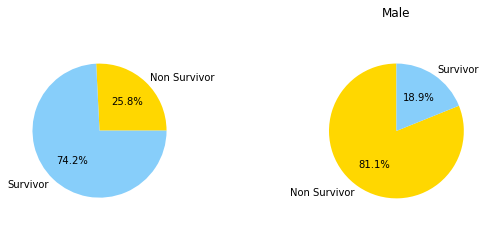

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

pie_1 = ax[0].pie(pie_female, labels=['Non Survivor', 'Survivor'],
                   autopct='%1.1f%%', colors=['gold', 'lightskyblue'])

ax[0].axis('equal')

pie_2 = ax[1].pie(pie_male, labels=['Non Survivor', 'Survivor'],
                   autopct='%1.1f%%', startangle=90, colors=['gold', 'lightskyblue'])
ax[1].set_title('Male')
plt.axis('equal')


plt.subplots_adjust(wspace=1)
plt.show()

#### Scatter Plot

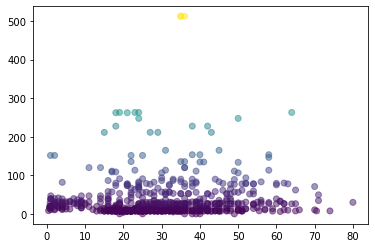

In [37]:
scatter_plot = plt.scatter(train_df['Age'], train_df['Fare'], alpha=0.5, c=train_df['Fare'])

#### Histograms

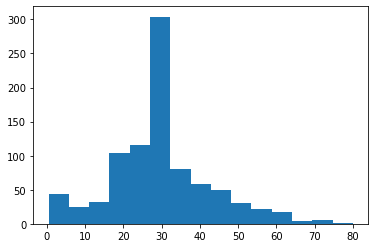

In [38]:
train_df.Age.fillna(train_df.Age.mean(), inplace=True)
hist_eg = plt.hist(train_df.Age, bins=15)
plt.show()

In [39]:
train_df.Age.describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64